In [1]:
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

# Three-Level Atoms

The simplest extension of the two-level model is to add a second frequency component near-resonant with a third atomic level. This may seem incremental but in fact produces a variety of interesting and useful phenomena, due to the presence of quantum superposition dark states.

There are three available configurations of three-level atoms according to the transitions chosen for coupling. We'll introduce each configuration in turn and show how to define this structure in MaxwellBloch.

## Ladder (Ξ) Configuration

In the $\Xi$ configuration, $|0\rangle$ is coupled to $|1\rangle$ as in the two-level atom with a field we'll now call the _probe_ field, with a Rabi frequency envelope $\Omega_p(t)$. A second field (which we'll call the _coupling_ field) couples the transition from this intermediate state to a higher state $|2\rangle$  with an envelope $\Omega_c(t)$. The transition $|0\rangle$ to $|2\rangle$ is taken to be dipole forbidden.

```
____ |2>
 |
 | Ω_c   
 |
____ |1>
 |
 | Ω_p
 |
____ |0>
```

Let's define this configuration in MaxwellBloch JSON. First, we'll turn off the coupling field so that although the atomic level is there, no population is driven to it. We do this by setting `"rabi_freq": 0` in the coupling field. Note that now there are two fields in the `fields` list, with the probe `"coupled_levels": [[0,1]]` and the coupling  `"coupled_levels": [[1,2]]`. Also, importantly, `"num_states": 3`. We've also added two decays, with the upper level taken to be a long-lived state that decays to the intermediate state.

In [2]:
mbs_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1]], 
        "rate": 1.0
      },
      { "channels": [[1,2]], 
        "rate": 1.0e-3
      }
    ],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "label": "coupling",
        "rabi_freq": 0.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "on": -2.0, 
          "off": 10.0
          },
        "rabi_freq_t_func": "square"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "interaction_strengths": [10.0, 10.0]
}
"""

In [3]:
from maxwellbloch import mb_solve

In [4]:
mbs = mb_solve.MBSolve().from_json_str(mbs_json)
Omegas_zt, states_zt = mbs.mbsolve()

10.0%. Run time:   0.87s. Est. time left: 00:00:00:07
20.0%. Run time:   1.78s. Est. time left: 00:00:00:07
30.0%. Run time:   2.59s. Est. time left: 00:00:00:06
40.0%. Run time:   3.33s. Est. time left: 00:00:00:04
50.0%. Run time:   3.95s. Est. time left: 00:00:00:03
60.0%. Run time:   4.49s. Est. time left: 00:00:00:02
70.0%. Run time:   5.06s. Est. time left: 00:00:00:02
80.0%. Run time:   5.63s. Est. time left: 00:00:00:01
90.0%. Run time:   6.21s. Est. time left: 00:00:00:00
Total run time:   6.98s


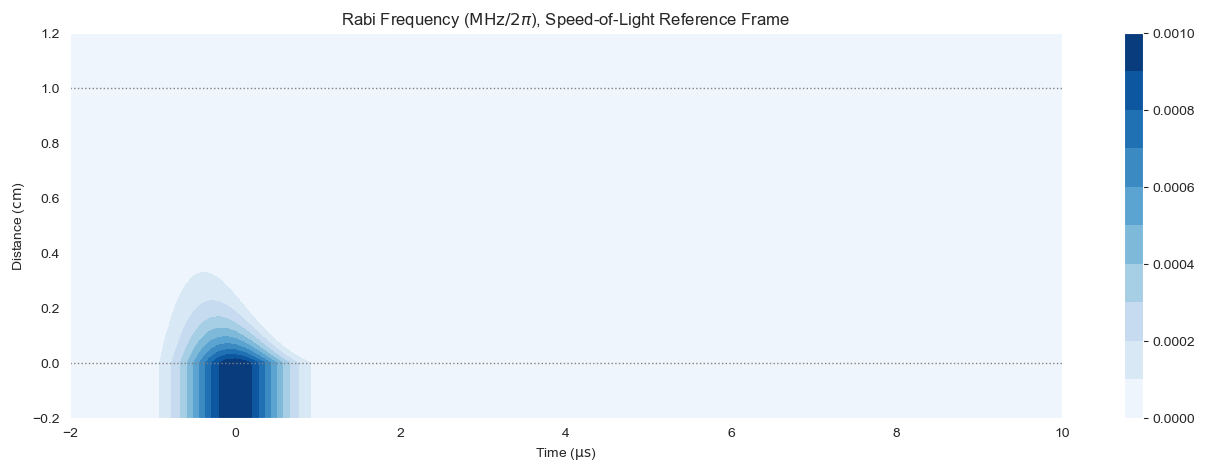

In [5]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Speed-of-Light Reference Frame')
ax.set_xlabel('Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

As we've turned off the coupling field, we see that the system behaves just like the two-level atom. The interaction strength is quite high, so the energy of the pulse is quicky absorbed by the medium.

### Electromagnetically Induced Transparency (EIT)

Next we'll take exactly the same system and set the coupling field `rabi_freq: 2.0`. The coupling field has a `square` profile covering the timespan of the simulation, which means it's continuously on.

In [6]:
mbs_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1]], 
        "rate": 1.0
      },
      { "channels": [[1,2]], 
        "rate": 1.0e-3
      }
    ],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "label": "coupling",
        "rabi_freq": 2.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "on": -2.0, 
          "off": 10.0
          },
        "rabi_freq_t_func": "square"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "interaction_strengths": [10.0, 10.0]
}
"""

In [7]:
mbs = mb_solve.MBSolve().from_json_str(mbs_json)
Omegas_zt, states_zt = mbs.mbsolve()

10.0%. Run time:   1.11s. Est. time left: 00:00:00:09
20.0%. Run time:   2.29s. Est. time left: 00:00:00:09
30.0%. Run time:   3.42s. Est. time left: 00:00:00:07
40.0%. Run time:   4.58s. Est. time left: 00:00:00:06
50.0%. Run time:   5.70s. Est. time left: 00:00:00:05
60.0%. Run time:   6.83s. Est. time left: 00:00:00:04
70.0%. Run time:   7.82s. Est. time left: 00:00:00:03
80.0%. Run time:   8.77s. Est. time left: 00:00:00:02
90.0%. Run time:   9.78s. Est. time left: 00:00:00:01
Total run time:  10.78s


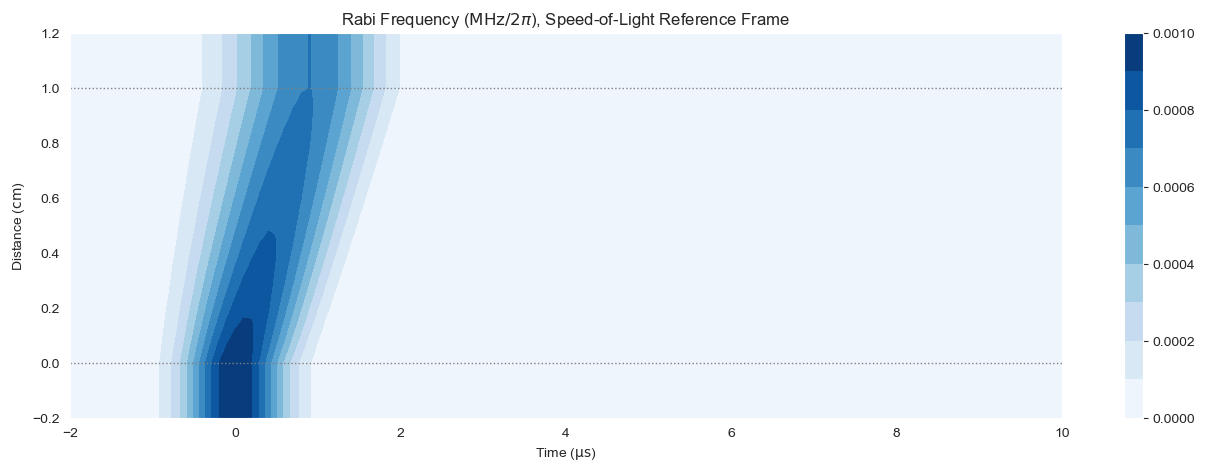

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Speed-of-Light Reference Frame')
ax.set_xlabel('Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

With the strong coupling field applied, we see that the pulse travels through the medium with much less absorption on resonance. This is the phenomena known as [Electromangetically Induced Transparency][eit] (EIT). The introduction of the strong coupling field leads to an transparent spectral window which allows this transmission of the probe pulse through the medium which it would ordinarily find to be opaque.

Notice that the pulse group velocity is slowed such that the envelope travels slower than the speed of light.

[eit]: https://en.wikipedia.org/wiki/Electromagnetically_induced_transparency

In [9]:
!make-mp4-fixed-frame.py

usage: _conda.exe [-h] [-V] command ...
_conda.exe: error: argument command: invalid choice: 'C:\\Users\\A_SAU\\Anaconda3\\envs\\mb\\Scripts\\make-mp4-fixed-frame.py' (choose from 'clean', 'config', 'create', 'help', 'info', 'init', 'install', 'list', 'package', 'remove', 'uninstall', 'run', 'search', 'update', 'upgrade')


In [10]:
from maxwellbloch import fixed

speed_of_light = 0.3 # [cm /μs] THIS IS 10^5 SLOWER THAN C!

tlist_fixed_frame = fixed.t_list(mbs, speed_of_light)
field_fixed_frame = fixed.rabi_freq_abs(mbs, 0, speed_of_light)

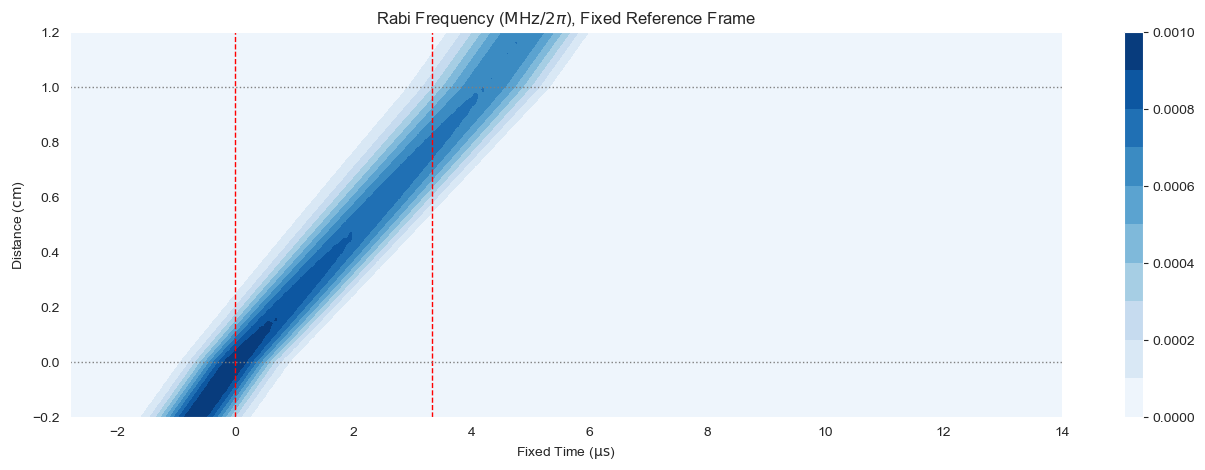

In [11]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mbs.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Fixed Reference Frame')
ax.set_xlabel('Fixed Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

## Lambda (Λ)

In the $\Lambda$ (lambda) configuration, the atom has two lower states $|0\rangle$ and $|2\rangle$, and
a single excited state $|1\rangle$ which is coupled to both lower states. These could for example represent a ground state hyperfine doublet. Coupling of the two lower states is taken to be dipole forbidden.

```
        ____ |1>
        /  \
  Ω_p  /    \  Ω_c
      /      \ 
|0> ____     ____ |2>
```

We define the lambda atom in almost the same way as the ladder atom, but this time note that $|2\rangle$ is below $|1\rangle$. The only difference this makes is that we have to set `detuning_positive: false`. Also note the reordering of the decay channels. So far all of the fields have been on resonance, but if we were adding detuning from resonance (by setting `detuning` nonzero for a field), the sign is dependendent on this ordering of the states. 

In [12]:
mbs_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1]], 
        "rate": 1.0
      },
      { "channels": [[2,1]], 
        "rate": 1.0e-3
      }
    ],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "label": "coupling",
        "detuning_positive": false,
        "rabi_freq": 2.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "on": -2.0, 
          "off": 10.0
          },
        "rabi_freq_t_func": "square"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "interaction_strengths": [10.0, 10.0]
}
"""

In [13]:
mbs = mb_solve.MBSolve().from_json_str(mbs_json)
Omegas_zt, states_zt = mbs.mbsolve()

10.0%. Run time:   1.25s. Est. time left: 00:00:00:11
20.0%. Run time:   2.66s. Est. time left: 00:00:00:10
30.0%. Run time:   3.90s. Est. time left: 00:00:00:09
40.0%. Run time:   5.05s. Est. time left: 00:00:00:07
50.0%. Run time:   6.45s. Est. time left: 00:00:00:06
60.0%. Run time:   8.02s. Est. time left: 00:00:00:05
70.0%. Run time:   9.07s. Est. time left: 00:00:00:03
80.0%. Run time:  10.01s. Est. time left: 00:00:00:02
90.0%. Run time:  11.19s. Est. time left: 00:00:00:01
Total run time:  12.21s


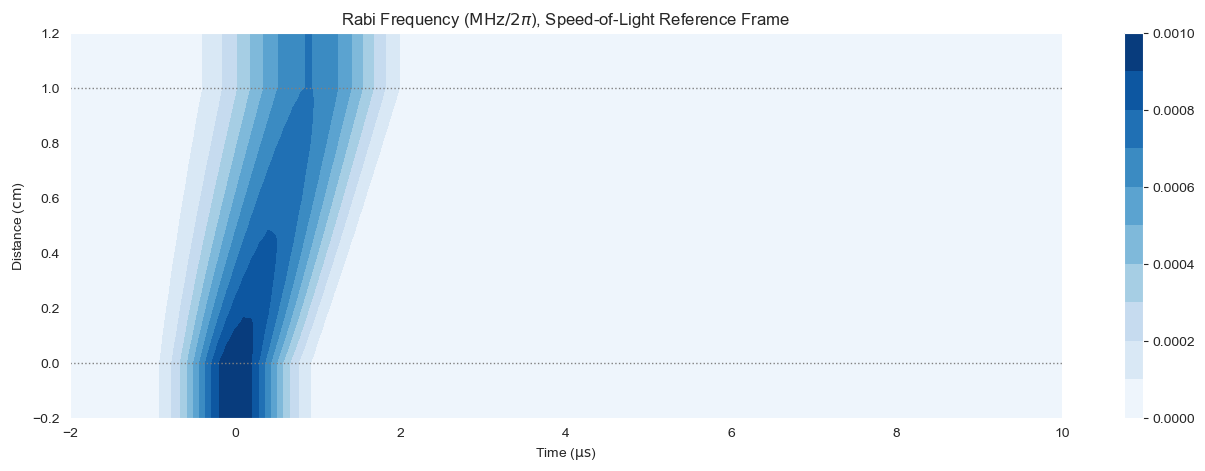

In [14]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Speed-of-Light Reference Frame')
ax.set_xlabel('Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

Here we see that EIT can also occur in the lambda system. In such a system we can even [store and retrieve][sr] the pulse envelope.

[sr]: https://github.com/tommyogden/notebooks-maxwellbloch/blob/master/examples/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store.ipynb

## Vee (V)

Finally, in the $V$ configuration, the atom has two excited states $|1\rangle$ and $|2\rangle$, and a single ground state level $|0\rangle$ which is coupled to both excited states. We do not allow transitions between the two excited states.

```
|1> ____    ____ |2>
      \      /
  Ω_p  \    /  Ω_c
        \  /
        ____ |0>
```

We'll put in a $\sqrt{2} \pi$ pulse into both transitions.

In [15]:
mbs_json = """
{
  "atom": {
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "label": "probe",
        "rabi_freq_t_args": 
          {
             "n_pi":  1.4142136,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "sech"
      },
      {
        "coupled_levels": [[0, 2]],
        "label": "coupling",
        "rabi_freq_t_args": 
          {
             "n_pi": 1.4142135,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "sech"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 70,
  "z_steps_inner": 1,
  "interaction_strengths": [10.0, 10.0]
}
"""

In [16]:
mbs = mb_solve.MBSolve().from_json_str(mbs_json)
Omegas_zt, states_zt = mbs.mbsolve()

10.0%. Run time:   1.02s. Est. time left: 00:00:00:09
20.0%. Run time:   2.26s. Est. time left: 00:00:00:09
30.0%. Run time:   4.17s. Est. time left: 00:00:00:09
40.0%. Run time:   6.10s. Est. time left: 00:00:00:09
50.0%. Run time:   8.11s. Est. time left: 00:00:00:08
60.0%. Run time:  10.06s. Est. time left: 00:00:00:06
70.0%. Run time:  12.10s. Est. time left: 00:00:00:05
80.0%. Run time:  14.14s. Est. time left: 00:00:00:03
90.0%. Run time:  16.27s. Est. time left: 00:00:00:01
Total run time:  18.50s


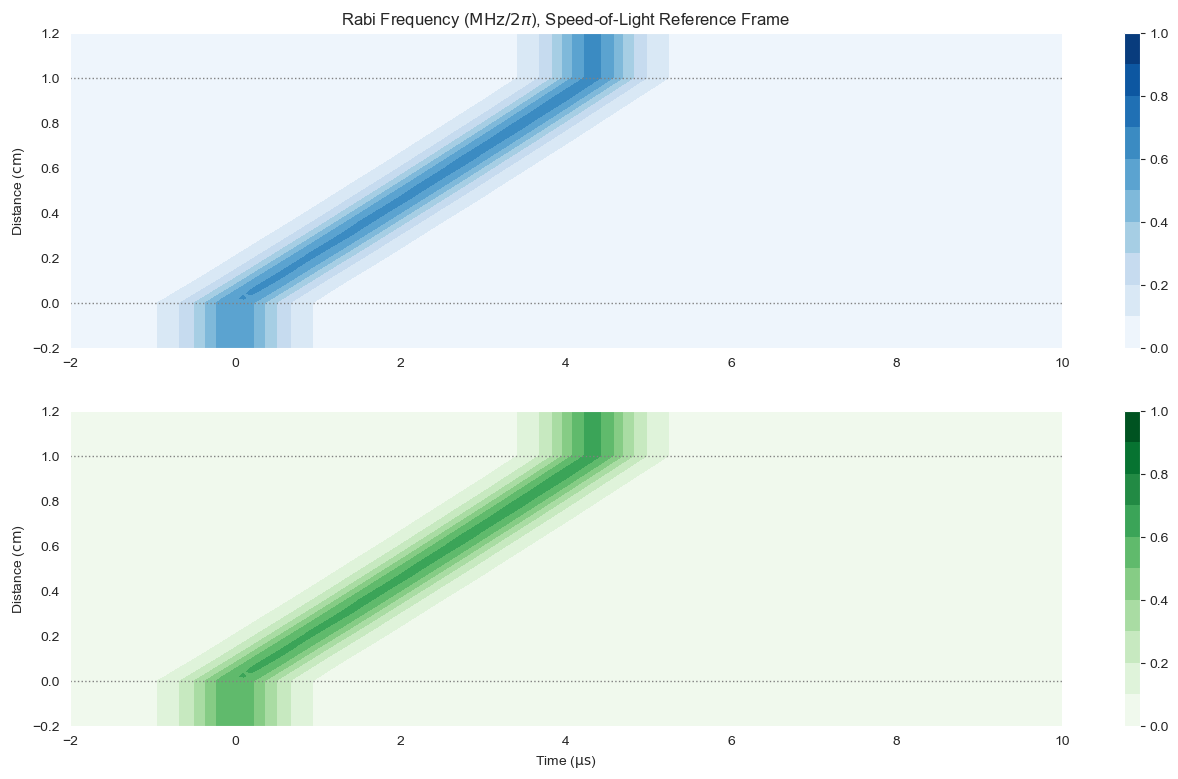

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(16, 9))
cmap_range = np.linspace(0.0, 1.0, 11)
cf_p = ax[0].contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range,
                 cmap=plt.cm.Blues)
plt.colorbar(cf_p, ax=ax[0]);
cf_c = ax[1].contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, 
                 cmap=plt.cm.Greens)
plt.colorbar(cf_c, ax=ax[1]);
ax[0].set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Speed-of-Light Reference Frame')
ax[1].set_xlabel('Time ($\mathrm{\mu s}$)')
for i in ax:
    for y in [0.0, 1.0]:
        i.axhline(y, c='grey', lw=1.0, ls='dotted')
    i.set_ylabel('Distance ($\mathrm{cm}$)')

Despite the individual pulse areas not being sufficient to form a soliton, the two fields together propogate a simulton pulse.